# XClone demo BCH869 scRNA-seq

scRNA-seq data

Author: Rongting Huang


Date: 2022-10-06

## Load packages

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xclone
xclone.__version__

import pandas as pd
import numpy as np
import scipy
scipy.__version__

import anndata as an

xclone.pp.efficiency_preview()

import warnings
warnings.filterwarnings('ignore')

'0.3.0'

'1.7.0'

[XClone efficiency] multiprocessing cpu total count in your device 112


## Part I Data preparation

## Part II Read depth count - RDR module

### option Notes：

remove celltype specific marker genes-yes

select X=4 normal chrs for libratio fitting

use Reference cells to fit the gene-specific dispersion

fit CNV ratio use 1(/4/5) gene groups

remove ref bio confounder-no

### params setting

In [8]:
## input and output dir
## files prepared
## params for this dataset

dataset_name = "BCH869_scRNA"
dat_dir = "/storage/yhhuang/users/rthuang/xclone/demo_v1/BCH869_scRNA/data/"
RDR_load_file = dat_dir + "BCH869_RDR_adata.h5ad"

# barcodes_key = "cell"
# cell_anno_key = ["Clone_ID", "Type", "cell_type"]
# cell_anno_key = "cell_type"
# ref_celltype = "N"

# cell_anno_key = "Clone_ID" # for visualization
# genome_mode = "hg19_genes"

## output
out_dir = "/storage/yhhuang/users/rthuang/xclone/demo_v1/BCH869_scRNA/data/"
fig_dir = "/storage/yhhuang/users/rthuang/xclone/demo_v1/BCH869_scRNA/plot/"


xclone.al.dir_make(out_dir)
xclone.al.dir_make(fig_dir)

# output before CNV calling
RDR_base_file = out_dir + "RDR_base_adata.h5ad"
RDR_bulk_file = out_dir + "RDR_bulk_adata.h5ad"
# output after CNV calling

# default 1
gene_exp_group = 1
RDR_final_file = out_dir + "RDR_adata_KNN_HMM_post.h5ad"

# default:XClone
fig_title = ""

rdr_smooth_fig = fig_dir + dataset_name + "_RDR_smooth.png"
rdr_final_fig = fig_dir + dataset_name + "_RDR_CNV.png"

### II-I: load data and check validation

In [ ]:
# load preprocessed dataset
RDR_adata = an.read_h5ad(RDR_load_file)

In [10]:
RDR_adata.obs

Sample  GenesExpressed  HousekeepingGeneExpression       Type  \
BT_869-P01-A02  BCH869            4669                    4.068260  Malignant   
BT_869-P01-A03  BCH869            5610                    5.366038  Malignant   
BT_869-P01-A04  BCH869            4291                    4.776805  Malignant   
BT_869-P01-A05  BCH869            7037                    5.597416  Malignant   
BT_869-P01-A06  BCH869            6305                    5.781886  Malignant   
...                ...             ...                         ...        ...   
BT_869-P12-H06  BCH869            5679                    5.317172  Malignant   
BT_869-P12-H08  BCH869            5019                    5.517751  Malignant   
BT_869-P12-H10  BCH869            5585                    5.428913  Malignant   
BT_869-P12-H11  BCH869            5479                    5.385734  Malignant   
BT_869-P12-H12  BCH869            4656                    5.321448  Malignant   

                Cellcycle  OPC-variable   OC-like   AC-like  OPC-like  \
BT_869-P01-A02  -0.508018     -0.185670  0.120597  4.531413 -2.639272   
BT_869-P01-A03   0.773064     -0.194324 -0.376308 -0.383702  0.376725   
BT_869-P01-A04  -0.627932     -0.660663 -0.609124  1.331465 -0.627191   
BT_869-P01-A05   1.879332     -0.894683  0.351868 -0.760143  0.373587   
BT_869-P01-A06  -0.433514     -1.867177 -0.569315  2.071405 -1.844495   
...                   ...           ...       ...       ...       ...   
BT_869-P12-H06  -0.066704     -1.055719 -0.246992 -0.868425  1.729569   
BT_869-P12-H08  -0.928456     -1.111589 -0.225560 -1.158018  0.567794   
BT_869-P12-H10   1.841893      0.616793 -0.303867 -1.006395 -0.467978   
BT_869-P12-H11  -0.028158     -1.416050 -0.687684  0.772264  0.127841   
BT_869-P12-H12  -0.744567     -1.300888 -0.637772  3.031662 -1.773091   

               Clone_ID cell_type  
BT_869-P01-A02      1.0         T  
BT_869-P01-A03      2.0         T  
BT_869-P01-A04      2.0         T  
BT_869-P01-A05      2.0         T  
BT_869-P01-A06      2.0         T  
...                 ...       ...  
BT_869-P12-H06      2.0         T  
BT_869-P12-H08      1.0         T  
BT_869-P12-H10      1.0         T  
BT_869-P12-H11      1.0         T  
BT_869-P12-H12      2.0         T  

[492 rows x 11 columns]

In [11]:
RDR_adata = xclone.pp.check_RDR(RDR_adata, cell_anno_key = "Clone_ID", cell_detection_rate = 0.05, verbose = True)

[XClone data preprocessing] check RDR raw dataset value: success
Keep valid cells: Filter out 0 cells / 492 total cells, remain 492 valid cells with annotation
[XClone data preprocessing] check RDR cell annotation: success
[XClone-RDR preprocessing] Filter out 12150 genes / 32696 total genes, remain 20546 genes
[XClone data preprocessing] detect RDR genes: done


In [12]:
RDR_adata

AnnData object with n_obs × n_vars = 492 × 20546
    obs: 'Sample', 'GenesExpressed', 'HousekeepingGeneExpression', 'Type', 'Cellcycle', 'OPC-variable', 'OC-like', 'AC-like', 'OPC-like', 'Clone_ID', 'cell_type'
    var: 'GeneName', 'GeneID', 'chr', 'start', 'stop', 'arm', 'chr_arm', 'band'
    uns: 'log', 'data_mode', 'genome_mode', 'data_notes'
    layers: 'raw_expr'

#### transformation True for smart-seq

In [13]:
RDR_adata = xclone.pp.Xtransformation(RDR_adata, transform = True, Xlayers = ["raw_expr"])

### II-II data preprocessing

mode: "FILTER", "ALL". default: "ALL" for whole preprocessing pipeline.

          if mode is FILTER, then return the filtered anndata;
          
          if mode is default, then return anndata and bulk anndata for following analysis.

In [14]:
RDR_adata = xclone.pp.Xdata_RDR_preprocess(RDR_adata, filter_ref_ave = 1.8, cell_anno_key = "cell_type", ref_celltype = "N", mode = "FILTER")

[XClone-RDR preprocessing] Filter out 15108 genes / 20546 total genes, remain 5438 genes


In [15]:
RDR_adata

AnnData object with n_obs × n_vars = 492 × 5438
    obs: 'Sample', 'GenesExpressed', 'HousekeepingGeneExpression', 'Type', 'Cellcycle', 'OPC-variable', 'OC-like', 'AC-like', 'OPC-like', 'Clone_ID', 'cell_type'
    var: 'GeneName', 'GeneID', 'chr', 'start', 'stop', 'arm', 'chr_arm', 'band', 'ref_avg'
    uns: 'log', 'data_mode', 'genome_mode', 'data_notes'
    layers: 'raw_expr'

#### remove marker genes 

In [16]:
## remove marker genes 
## saved the marker genes in list
## default top 15 genes for each celltype
marker_genes = xclone.pp.get_markers(RDR_adata, 
                                     top_n =20, 
                                     target_sum=1e4, 
                                     rank_group = "Clone_ID",
                                     marker_genes_key = "rank_marker_genes", 
                                     test_method='wilcoxon')
# RDR_adata_NOmarkers = xclone.model.filter_markers(RDR_adata, marker_lst = marker_genes)
RDR_adata = xclone.pp.filter_markers(RDR_adata, marker_lst = marker_genes)

... storing 'Sample' as categorical
... storing 'GeneName' as categorical
... storing 'chr' as categorical
... storing 'arm' as categorical
... storing 'chr_arm' as categorical
... storing 'band' as categorical


[XClone] use marker genes provided by users: 
 ['AC020594.5' 'AFF3' 'AHCY' 'ALCAM' 'APOD' 'ASTN2' 'ATF3' 'ATL3' 'ATP1B1'
 'ATP2B1' 'B2M' 'C15orf38' 'C7orf55-LUC7L2' 'CDK2AP1' 'CLU' 'CNTD1'
 'CNTN5' 'CTD-2370N5.3' 'CTTNBP2' 'DAAM2' 'DBI' 'DCC' 'DOCK3' 'EEPD1'
 'EGR2' 'ELL2' 'ENPP2' 'EPHA7' 'ERBB3' 'ERBB4' 'ERCC1' 'EVI2A' 'FOSB'
 'FOXN3' 'FSTL5' 'GALNT13' 'GLCCI1' 'GLUD1' 'GPM6B' 'GSN' 'GSN-AS1'
 'HLA-B' 'HLA-C' 'ITPKB' 'JAZF1' 'JUNB' 'KIF1A' 'LPCAT2' 'LPPR1' 'LRP1B'
 'LRRK2' 'LUC7L2' 'MACROD1' 'MAP2' 'MOCS1' 'NINJ2' 'NKAIN2' 'NTM' 'PARD3B'
 'PCDH9' 'PFKFB3' 'PILRB' 'PLD1' 'PLEKHB1' 'PLXDC2' 'PLXNB1' 'PRKG1'
 'PROX1' 'PTPRN2' 'PTPRS' 'RAPGEF3' 'RHOB' 'RP11-108K3.1' 'RP11-218M22.1'
 'RP11-477J21.6' 'RP11-603J24.9' 'RP4-777D9.2' 'RP5-872K7.7' 'RPS18'
 'SEMA6D' 'SERP1' 'SFMBT2' 'SGCD' 'SIRT2' 'SLC31A2' 'SOX10' 'SPARC' 'SPP1'
 'SRI' 'ST3GAL6' 'SYNGR2' 'TENC1' 'TENM4' 'TLR1' 'TNFAIP8L3' 'TSPAN15'
 'TSPO' 'UPK3B' 'ZFAS1' 'ZNF429']
filter_genes_num: 100
used_genes_num: 5338


In [17]:
RDR_adata

View of AnnData object with n_obs × n_vars = 492 × 5338
    obs: 'Sample', 'GenesExpressed', 'HousekeepingGeneExpression', 'Type', 'Cellcycle', 'OPC-variable', 'OC-like', 'AC-like', 'OPC-like', 'Clone_ID', 'cell_type'
    var: 'GeneName', 'GeneID', 'chr', 'start', 'stop', 'arm', 'chr_arm', 'band', 'ref_avg'
    uns: 'log', 'data_mode', 'genome_mode', 'data_notes', 'rank_marker_genes'
    layers: 'raw_expr'

In [18]:
RDR_adata, RDR_adata_bulk = xclone.pp.Xdata_RDR_preprocess(RDR_adata, filter_ref_ave = None, cell_anno_key = "cell_type", ref_celltype = "N")

Trying to set attribute `.var` of view, copying.


output anndata is not sparse matrix.


In [19]:
RDR_adata

AnnData object with n_obs × n_vars = 492 × 5338
    obs: 'Sample', 'GenesExpressed', 'HousekeepingGeneExpression', 'Type', 'Cellcycle', 'OPC-variable', 'OC-like', 'AC-like', 'OPC-like', 'Clone_ID', 'cell_type'
    var: 'GeneName', 'GeneID', 'chr', 'start', 'stop', 'arm', 'chr_arm', 'band', 'ref_avg'
    uns: 'log', 'data_mode', 'genome_mode', 'data_notes', 'rank_marker_genes'
    layers: 'raw_expr', 'raw_ratio'

In [20]:
RDR_adata_bulk

AnnData object with n_obs × n_vars = 2 × 5338
    obs: 'cell_type'
    var: 'GeneName', 'GeneID', 'chr', 'start', 'stop', 'arm', 'chr_arm', 'band', 'ref_avg'
    layers: 'raw_ratio'

### II-II-fit libratio

For celltype and cell

In [21]:
RDR_adata_bulk = xclone.model.select_normal_CHR(RDR_adata_bulk, select_chr_num = 4)

## extend the chr index to whole dataset for libratio fitting
### For celltype:
RDR_adata_bulk= xclone.model.extend_chr_index_to_singlecell(RDR_adata_bulk, RDR_adata_bulk, cell_anno_key = "cell_type")
# For cell:
RDR_adata = xclone.model.extend_chr_index_to_singlecell(RDR_adata, RDR_adata_bulk, cell_anno_key = "cell_type")

In [22]:
RDR_adata.obsm["select_chr_index"]

array([[13.,  5., 18., 10.],
       [13.,  5., 18., 10.],
       [13.,  5., 18., 10.],
       ...,
       [13.,  5., 18., 10.],
       [13.,  5., 18., 10.],
       [13.,  5., 18., 10.]])

In [23]:
RDR_adata_bulk = xclone.model.fit_lib_ratio(RDR_adata_bulk, verbose=True, NB_kwargs={'disp': True, 'skip_hessian': True}) 

['1', '2', '3', '17']
0 1579
Optimization terminated successfully.
         Current function value: 2.012379
         Iterations: 17
         Function evaluations: 19
         Gradient evaluations: 19
['14', '6', '19', '11']
1 1064
Optimization terminated successfully.
         Current function value: 7.605090
         Iterations: 7
         Function evaluations: 9
         Gradient evaluations: 9
[XClone RDR library ratio fitting] Time used: 0 seconds


In [24]:
RDR_adata_bulk.obs

cell_type  library_ratio  library_alpha  sample_chr_total  ref_chr_total  \
0         N       0.999999       0.000001           14392.0        14392.0   
1         T     113.700233       0.305153         1081788.0         9559.0   

   sample_chr_total_normalization  
0                        1.000000  
1                      113.169579

In [25]:
## fit libratio for all cells
RDR_adata = xclone.model.fit_lib_ratio(RDR_adata, verbose=False, NB_kwargs={'disp': False, 'skip_hessian': True})

[XClone RDR library ratio fitting] Time used: 22 seconds


In [26]:
xclone.model.check_libratio(RDR_adata, anno_key = "library_ratio")

[XClone RDR library ratio]: checking
max_value: 1.5952374819713828
min_value: 0.21149052430463572
qt_0.95_value: 1.114031199368292
qt_0.05_value: 0.3516167857336608


In [27]:
RDR_adata = xclone.model.libsize_clip(RDR_adata, max_threshold = 5)

[XClone RDR library ratio]: clipping


In [28]:
RDR_adata

AnnData object with n_obs × n_vars = 492 × 5338
    obs: 'Sample', 'GenesExpressed', 'HousekeepingGeneExpression', 'Type', 'Cellcycle', 'OPC-variable', 'OC-like', 'AC-like', 'OPC-like', 'Clone_ID', 'cell_type', 'library_ratio', 'library_alpha', 'sample_chr_total', 'ref_chr_total', 'sample_chr_total_normalization', 'library_ratio_capped'
    var: 'GeneName', 'GeneID', 'chr', 'start', 'stop', 'arm', 'chr_arm', 'band', 'ref_avg'
    uns: 'log', 'data_mode', 'genome_mode', 'data_notes', 'rank_marker_genes'
    obsm: 'select_chr_index'
    layers: 'raw_expr', 'raw_ratio'

### II-III-fit dispersion for each gene

In [29]:
RDR_adata

AnnData object with n_obs × n_vars = 492 × 5338
    obs: 'Sample', 'GenesExpressed', 'HousekeepingGeneExpression', 'Type', 'Cellcycle', 'OPC-variable', 'OC-like', 'AC-like', 'OPC-like', 'Clone_ID', 'cell_type', 'library_ratio', 'library_alpha', 'sample_chr_total', 'ref_chr_total', 'sample_chr_total_normalization', 'library_ratio_capped'
    var: 'GeneName', 'GeneID', 'chr', 'start', 'stop', 'arm', 'chr_arm', 'band', 'ref_avg'
    uns: 'log', 'data_mode', 'genome_mode', 'data_notes', 'rank_marker_genes'
    obsm: 'select_chr_index'
    layers: 'raw_expr', 'raw_ratio'

In [30]:
## View cells number for each celltype and select one celltype for dispersion fitting
xclone.model.view_celltype(RDR_adata, cell_anno_key = "cell_type")

T    489
N      3
Name: cell_type, dtype: int64


T    489
N      3
Name: cell_type, dtype: int64

In [31]:
RDR_adata_REF = xclone.model.select_celltype(RDR_adata, cell_anno_key = "cell_type", select_celltype = "N")
## fit gene-specific dispersion based on reference celltype
RDR_adata_REF = xclone.model.fit_Dispersions(RDR_adata_REF, libsize_key = "library_ratio_capped", NB_kwargs={'disp': False, 'skip_hessian': True}, verbose=False, model_results_path=None)

Trying to set attribute `.var` of view, copying.


[XClone RDR gene dispersion fitting] Time used: 45 seconds


In [32]:
RDR_adata_REF

AnnData object with n_obs × n_vars = 3 × 5338
    obs: 'Sample', 'GenesExpressed', 'HousekeepingGeneExpression', 'Type', 'Cellcycle', 'OPC-variable', 'OC-like', 'AC-like', 'OPC-like', 'Clone_ID', 'cell_type', 'library_ratio', 'library_alpha', 'sample_chr_total', 'ref_chr_total', 'sample_chr_total_normalization', 'library_ratio_capped'
    var: 'GeneName', 'GeneID', 'chr', 'start', 'stop', 'arm', 'chr_arm', 'band', 'ref_avg', 'dispersion', 'gene_dispersion_bse'
    uns: 'log', 'data_mode', 'genome_mode', 'data_notes', 'rank_marker_genes', 'fit_dispersion_removed_genes'
    obsm: 'select_chr_index'
    layers: 'raw_expr', 'raw_ratio'

In [33]:
xclone.model.check_dispersion(RDR_adata_REF, anno_key = "dispersion")

[XClone RDR gene-specific dispersion]: checking
max_value: 6.562489264291456
min_value: 2.515314515478787e-08
qt_0.95_value: 4.02098279579869
qt_0.05_value: 1.3111472327566508e-06


In [34]:
RDR_adata = xclone.model.map_var_info(RDR_adata, RDR_adata_REF, specific_celltype = "N")
RDR_adata = xclone.model.remove_genes(RDR_adata)
RDR_adata = xclone.model.remove_genes(RDR_adata, mode="INF")

remove no GLM results genes num: 0
remove inf dispersion genes num: 0


In [35]:
RDR_adata

View of AnnData object with n_obs × n_vars = 492 × 5338
    obs: 'Sample', 'GenesExpressed', 'HousekeepingGeneExpression', 'Type', 'Cellcycle', 'OPC-variable', 'OC-like', 'AC-like', 'OPC-like', 'Clone_ID', 'cell_type', 'library_ratio', 'library_alpha', 'sample_chr_total', 'ref_chr_total', 'sample_chr_total_normalization', 'library_ratio_capped'
    var: 'GeneName', 'GeneID', 'chr', 'start', 'stop', 'arm', 'chr_arm', 'band', 'ref_avg', 'dispersion', 'gene_dispersion_bse'
    uns: 'log', 'data_mode', 'genome_mode', 'data_notes', 'rank_marker_genes', 'fit_dispersion_removed_genes', 'dispersion_base_celltype'
    obsm: 'select_chr_index'
    layers: 'raw_expr', 'raw_ratio'

In [36]:
xclone.model.check_dispersion(RDR_adata, anno_key = "dispersion")

[XClone RDR gene-specific dispersion]: checking
max_value: 6.562489264291456
min_value: 2.515314515478787e-08
qt_0.95_value: 4.02098279579869
qt_0.05_value: 1.3111472327566508e-06


In [37]:
RDR_adata = xclone.model.dispersion_clip(RDR_adata, qt_low = 0.03, qt_up =0.999, min_threshold = None, max_threshold = None)

Trying to set attribute `.var` of view, copying.


[XClone RDR library ratio]: clipping


In [38]:
xclone.model.check_dispersion(RDR_adata, anno_key = "dispersion_capped")

[XClone RDR gene-specific dispersion]: checking
max_value: 6.319602217147366
min_value: 8.177894568161771e-07
qt_0.95_value: 4.02098279579869
qt_0.05_value: 1.3111472327566508e-06


In [39]:
RDR_adata

AnnData object with n_obs × n_vars = 492 × 5338
    obs: 'Sample', 'GenesExpressed', 'HousekeepingGeneExpression', 'Type', 'Cellcycle', 'OPC-variable', 'OC-like', 'AC-like', 'OPC-like', 'Clone_ID', 'cell_type', 'library_ratio', 'library_alpha', 'sample_chr_total', 'ref_chr_total', 'sample_chr_total_normalization', 'library_ratio_capped'
    var: 'GeneName', 'GeneID', 'chr', 'start', 'stop', 'arm', 'chr_arm', 'band', 'ref_avg', 'dispersion', 'gene_dispersion_bse', 'dispersion_capped'
    uns: 'log', 'data_mode', 'genome_mode', 'data_notes', 'rank_marker_genes', 'fit_dispersion_removed_genes', 'dispersion_base_celltype'
    obsm: 'select_chr_index'
    layers: 'raw_expr', 'raw_ratio'

In [40]:
RDR_adata.write(RDR_base_file)
RDR_adata_bulk.write(RDR_bulk_file)

... storing 'Sample' as categorical
... storing 'GeneName' as categorical
... storing 'chr' as categorical
... storing 'arm' as categorical
... storing 'chr_arm' as categorical
... storing 'band' as categorical
... storing 'GeneName' as categorical
... storing 'chr' as categorical
... storing 'arm' as categorical
... storing 'chr_arm' as categorical
... storing 'band' as categorical


### II-IV-fit CNV ratio

option:

can set groups for different gene expression levels

In [41]:
RDR_adata = xclone.model.extra_preprocess(RDR_adata, cluster_key = "cell_type", ref_celltype="N", 
                               depth_key='library_ratio_capped', 
                               low_dim=False, run_KNN=True, copy=True)

In [42]:
RDR_adata

AnnData object with n_obs × n_vars = 492 × 5338
    obs: 'Sample', 'GenesExpressed', 'HousekeepingGeneExpression', 'Type', 'Cellcycle', 'OPC-variable', 'OC-like', 'AC-like', 'OPC-like', 'Clone_ID', 'cell_type', 'library_ratio', 'library_alpha', 'sample_chr_total', 'ref_chr_total', 'sample_chr_total_normalization', 'library_ratio_capped', 'counts_ratio'
    var: 'GeneName', 'GeneID', 'chr', 'start', 'stop', 'arm', 'chr_arm', 'band', 'ref_avg', 'dispersion', 'gene_dispersion_bse', 'dispersion_capped'
    uns: 'log', 'data_mode', 'genome_mode', 'data_notes', 'rank_marker_genes', 'fit_dispersion_removed_genes', 'dispersion_base_celltype', 'pca', 'neighbors'
    obsm: 'select_chr_index', 'X_pca'
    varm: 'PCs'
    layers: 'raw_expr', 'raw_ratio', 'ref_normalized', 'expected'
    obsp: 'distances', 'connectivities'

In [43]:
RDR_adata = xclone.model.RDR_smoothing_base(RDR_adata,
                       clip = True,
                       outlayer = "RDR_smooth",
                       cell_anno_key = "Clone_ID",
                       ref_celltype = 5,
                       WMA_window_size = 40,
                       KNN_sm = True,
                       KNN_connect_use = "connectivities")

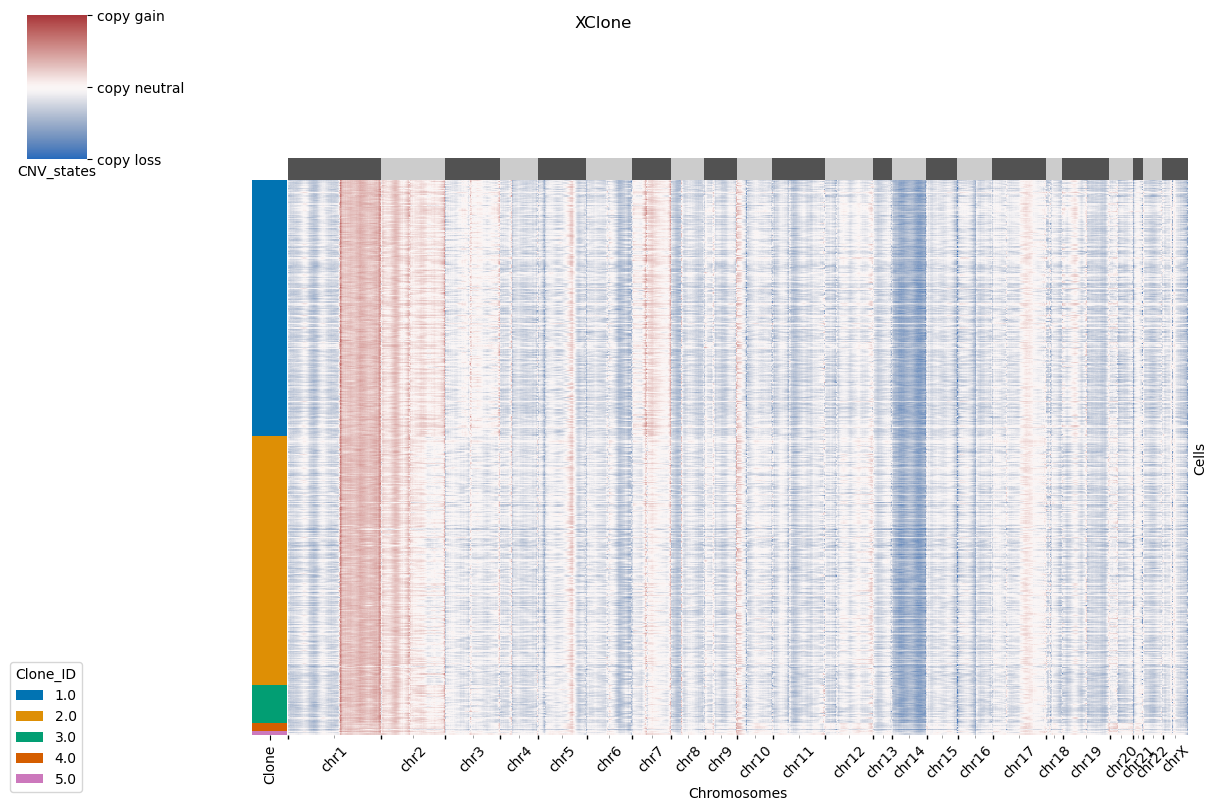

In [44]:
xclone.pl.smooth_visualization(RDR_adata, Xlayer = "RDR_smooth", cell_anno_key = 'Clone_ID', 
                   vmin=-0.7, vmax=0.7, save_file = True, out_file = rdr_smooth_fig )

[XClone] RDR CNV states chrs guiding(copy loss, copy neutral, copy gain): ['14q', '6p', '1q']


['14q', '6p', '1q']

CNV loss:  0.5650073651682224


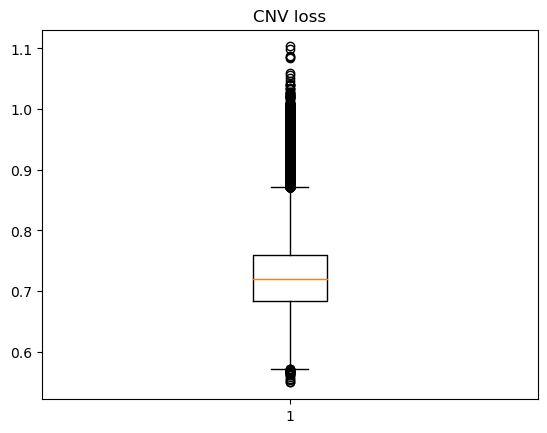

CNV neutral:  1.017414751554808


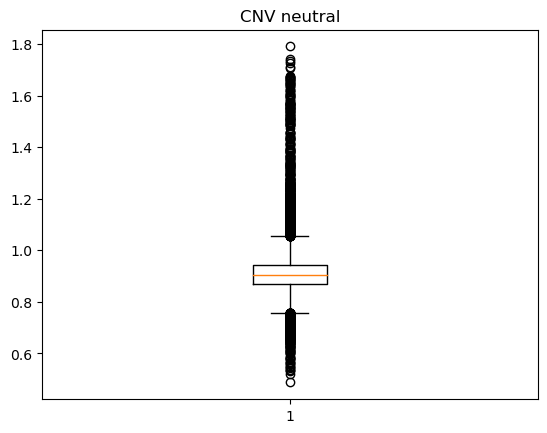

CNV gain:  1.634510067300665


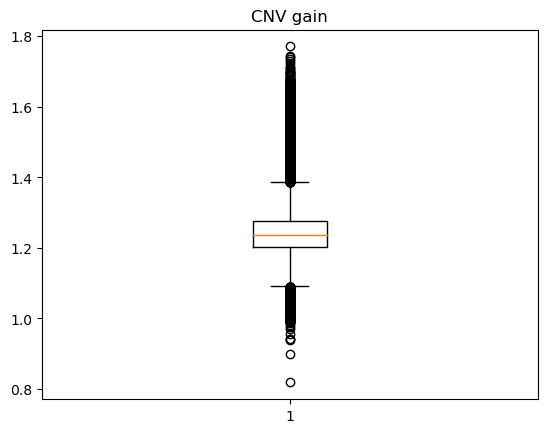

[XClone] RDR CNV states ratio guiding(copy loss, copy neutral, copy gain): [0.56500737 1.01741475 1.63451007]


array([0.56500737, 1.01741475, 1.63451007])

In [45]:
guide_chr_lst, anno_key = xclone.model.guide_CNV_chrs(RDR_adata, Xlayer = "RDR_smooth", anno_key = "chr_arm")
guide_chr_lst

guide_cnv_ratio = xclone.model.guide_CNV_states(RDR_adata, Xlayer = "RDR_smooth", chr_lst = guide_chr_lst, anno_key = "chr_arm", qt_lst = [0.0001, 0.96, 0.999], show_boxplot = True)
guide_cnv_ratio

In [46]:
RDR_adata = xclone.model.gene_exp_group(RDR_adata, n_group = gene_exp_group, verbose=True)

expression_brk [0.6931472 2.036882 ]


[XClone] CNV_optimazation iteration:  1
filter nan emm_prob
[XClone HMM smoothing] Time used: 22 seconds
[XClone] CNV_optimazation iteration:  2
[XClone] fit CNV ratio
16       0.000011
35       0.902811
57       0.000012
68       1.143217
70       0.000006
           ...   
32560    0.088331
32565    0.000016
32567    0.000016
32568    0.000016
32581    0.000007
Name: dispersion_capped, Length: 5337, dtype: float64
[XClone] GLM success:
[5. 4. 6. ... 0. 0. 0.] [1. 1. 1. ... 1. 1. 1.] [2.11232574 1.76783605 3.17961738 ... 2.10284837 0.93036781 2.69340259] [0. 0. 0. ... 0. 0. 1.]
[XClone] GLM success:
[5. 4. 6. ... 0. 0. 0.] [1. 1. 1. ... 1. 1. 1.] [2.11232574 1.76783605 3.17961738 ... 2.10284837 0.93036781 2.69340259] [0. 0. 0. ... 1. 1. 0.]
[XClone] GLM success:
[5. 4. 6. ... 0. 0. 0.] [1. 1. 1. ... 1. 1. 1.] [2.11232574 1.76783605 3.17961738 ... 2.10284837 0.93036781 2.69340259] [1. 1. 1. ... 0. 0. 0.]
Time used 2 seconds
filter nan emm_prob
[XClone HMM smoothing] Time used: 31 secon

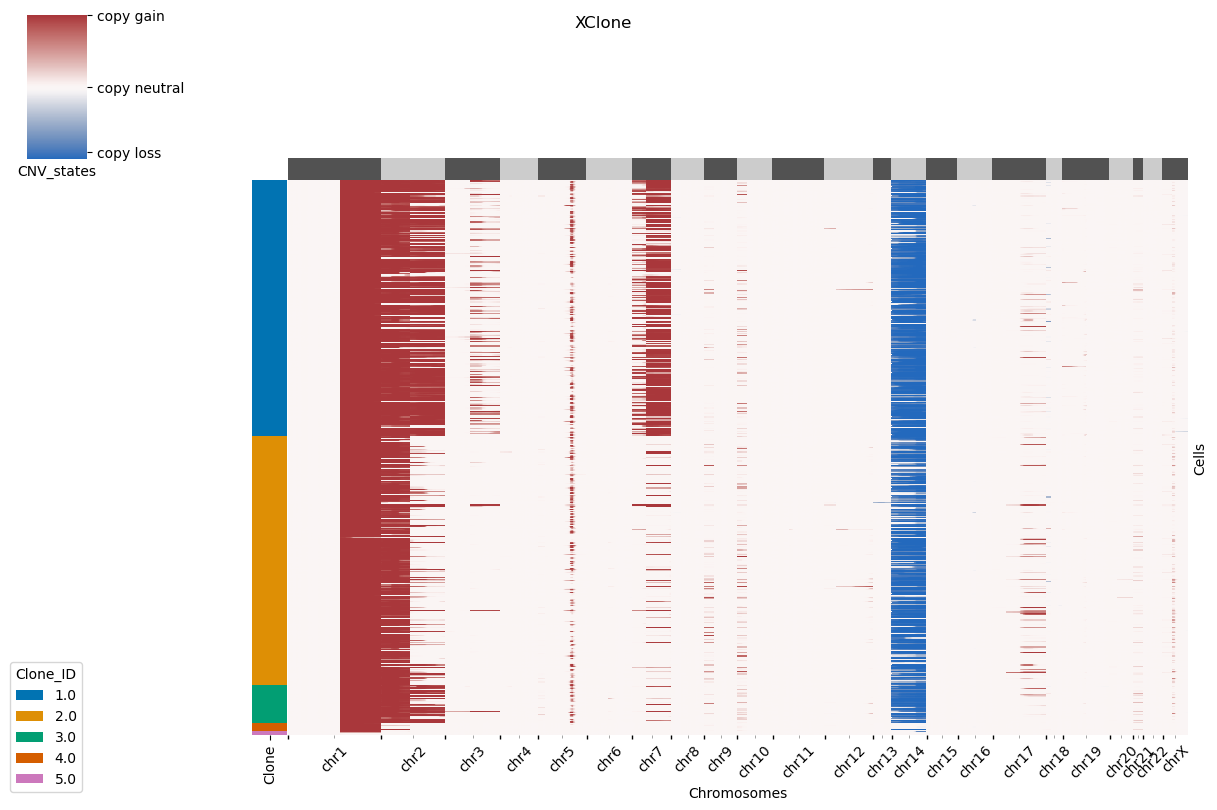

In [47]:
t = 1e-4
trans_prob = np.array([[1-2*t, t, t],[t, 1-2*t, t],[t, t, 1-2*t]])

start_prob = np.array([0.3,0.4,0.3])

RDR_adata = xclone.model.CNV_optimazation(RDR_adata, init_state_ratio = guide_cnv_ratio, 
                    max_iter=2, 
                    min_iter=1,
                    start_prob = start_prob,
                    trans_prob = trans_prob)
xclone.pl.CNV_visualization(RDR_adata, states_weight = np.array([1,2,3]), weights = True, cell_anno_key = "Clone_ID", save_file = True, out_file = rdr_final_fig)

In [48]:
## default 1 groups
RDR_adata.write(RDR_final_file)

## Part III-Allele frequency  - BAF module

### params setting

In [49]:
## input and output dir
## files prepared
## params for this dataset

dataset_name = "BCH869_scRNA"

dat_dir = "/storage/yhhuang/users/rthuang/xclone/demo_v1/BCH869_scRNA/data/"
BAF_load_file = dat_dir + "BCH869_BAF_adata.h5ad"

## params
genome_mode = "hg19_genes"


## output
out_dir = "/storage/yhhuang/users/rthuang/xclone/demo_v1/BCH869_scRNA/data/"
fig_dir = "/storage/yhhuang/users/rthuang/xclone/demo_v1/BCH869_scRNA/plot/"

xclone.al.dir_make(out_dir)
xclone.al.dir_make(fig_dir)

# output before CNV calling
BAF_base_file = out_dir + "BAF_base_Xdata.h5ad"
BAF_merge_base_file = out_dir + "BAF_merge_base_Xdata.h5ad"

# output after CNV calling

# default 1
gene_exp_group = 1
BAF_final_file = out_dir + "BAF_merge_Xdata_KNN_HMM_post.h5ad"


# default:XClone
fig_title = ""

baf_smooth_fig = fig_dir + dataset_name + "_BAF_smooth.png"
baf_final_fig = fig_dir + dataset_name + "_BAF_CNV.png"

## use RDR connectivities
RDR_final_file = out_dir + "RDR_adata_KNN_HMM_post.h5ad"

### III-I: load data and check validation

In [50]:
BAF_adata = an.read_h5ad(BAF_load_file)

In [51]:
BAF_adata

AnnData object with n_obs × n_vars = 492 × 32696
    obs: 'Sample', 'GenesExpressed', 'HousekeepingGeneExpression', 'Type', 'Cellcycle', 'OPC-variable', 'OC-like', 'AC-like', 'OPC-like', 'Clone_ID', 'cell_type'
    var: 'GeneName', 'GeneID', 'chr', 'start', 'stop', 'arm', 'chr_arm', 'band'
    uns: 'log', 'data_mode', 'genome_mode', 'data_notes'
    layers: 'AD', 'DP'

In [52]:
BAF_adata = xclone.pp.check_BAF(BAF_adata, cell_anno_key = "Clone_ID", verbose = True)

[XClone data preprocessing] check BAF raw dataset value: success
Keep valid cells: Filter out 0 cells / 492 total cells, remain 492 valid cells with annotation
[XClone data preprocessing] check BAF cell annotation: success


In [53]:
BAF_adata

AnnData object with n_obs × n_vars = 492 × 32696
    obs: 'Sample', 'GenesExpressed', 'HousekeepingGeneExpression', 'Type', 'Cellcycle', 'OPC-variable', 'OC-like', 'AC-like', 'OPC-like', 'Clone_ID', 'cell_type'
    var: 'GeneName', 'GeneID', 'chr', 'start', 'stop', 'arm', 'chr_arm', 'band'
    uns: 'log', 'data_mode', 'genome_mode', 'data_notes'
    layers: 'AD', 'DP'

#### check validated RDR and BAF

In [54]:
import anndata as an
# load preprocessed dataset
RDR_adata = an.read_h5ad(RDR_final_file)
xclone.pp.check_RDR_BAF_cellorder(RDR_adata, BAF_adata)

[XClone data checking]: RDR and BAF in same cell order


True

#### Remove marker genes

In [55]:
marker_genes = RDR_adata.uns["rank_marker_genes"]
BAF_adata = xclone.pp.Xdata_region_selection(BAF_adata,
                           select = False,
                           chr_anno_key = "GeneName",
                           chr_lst = marker_genes,
                           update_uns = False,
                           uns_anno_key = None)

[XClone-data removing]:
Filter out 100 genes / 32696 total genes, remain 32596 regions


In [56]:
BAF_adata

AnnData object with n_obs × n_vars = 492 × 32596
    obs: 'Sample', 'GenesExpressed', 'HousekeepingGeneExpression', 'Type', 'Cellcycle', 'OPC-variable', 'OC-like', 'AC-like', 'OPC-like', 'Clone_ID', 'cell_type'
    var: 'GeneName', 'GeneID', 'chr', 'start', 'stop', 'arm', 'chr_arm', 'band'
    uns: 'log', 'data_mode', 'genome_mode', 'data_notes'
    layers: 'AD', 'DP'

## III-II: BAF Phasing

In [57]:
BAF_adata, merge_Xdata =  xclone.model.BAF_Local_phasing(BAF_adata, region_key = "chr", phasing_len = 100, bin_nproc=20)

[XClone-Local_phasing] time_used: 76.97seconds


In [58]:
BAF_adata, merge_Xdata = xclone.model.BAF_Global_phasing(BAF_adata, merge_Xdata)

[XClone-Global_phasing] time_used: 8.52seconds


In [59]:
BAF_adata.write(BAF_base_file)
merge_Xdata.write(BAF_merge_base_file)

... storing 'Sample' as categorical
... storing 'GeneName' as categorical
... storing 'chr' as categorical
... storing 'arm' as categorical
... storing 'chr_arm' as categorical
... storing 'band' as categorical
... storing 'Sample' as categorical
... storing 'chr' as categorical
... storing 'arm' as categorical
... storing 'chr_arm' as categorical
... storing 'band' as categorical
... storing 'bin_stop_arm' as categorical
... storing 'bin_stop_chr_arm' as categorical
... storing 'bin_stop_band' as categorical


### check coverage

In [60]:
merge_Xdata.var[(merge_Xdata.layers["dp_bin"].A.sum(axis=0) == 0)]

chr     start      stop arm chr_arm    band  gene1_stop bin_stop_arm  \
32584   Y   2654896  26632610   p      Yp  p11.31     2655740            q   
32684   Y  26716349  28114889   q      Yq  q11.23    26753172            q   

      bin_stop_chr_arm bin_stop_band  bin_idx  bin_idx_cum  \
32584               Yq        q11.23        0          337   
32684               Yq        q11.23        1          338   

                                            GeneName_lst  \
32584  [SRY, RPS4Y1, ZFY, ZFY-AS1, LINC00278, TGIF2LY...   
32684  [TTTY4B, BPY2B, DAZ3, DAZ4, BPY2C, TTTY4C, TTT...   

                                              GeneID_lst  bin_genes_cnt  
32584  [ENSG00000184895, ENSG00000129824, ENSG0000006...            100  
32684  [ENSG00000235412, ENSG00000183795, ENSG0000018...             12

### Check phasing performance

In [61]:
merge_Xdata = xclone.pl.calculate_cell_BAF(merge_Xdata, AD_key = "ad_bin1", DP_key = "dp_bin", BAF_key = "BAF")
merge_Xdata = xclone.pl.calculate_cell_BAF(merge_Xdata, AD_key = "ad_bin1_phased", DP_key = "dp_bin", BAF_key = "BAF_phased")

In [62]:
merge_Xdata

AnnData object with n_obs × n_vars = 492 × 339
    obs: 'Sample', 'GenesExpressed', 'HousekeepingGeneExpression', 'Type', 'Cellcycle', 'OPC-variable', 'OC-like', 'AC-like', 'OPC-like', 'Clone_ID', 'cell_type'
    var: 'chr', 'start', 'stop', 'arm', 'chr_arm', 'band', 'gene1_stop', 'bin_stop_arm', 'bin_stop_chr_arm', 'bin_stop_band', 'bin_idx', 'bin_idx_cum', 'GeneName_lst', 'GeneID_lst', 'bin_genes_cnt'
    uns: 'GeneName_lst', 'GeneID_lst', 'local_phasing_key', 'local_phasing_len'
    layers: 'ad_bin', 'ad_bin1', 'dp_bin', 'ad_bin_phased', 'ad_bin1_phased', 'BAF', 'BAF_phased'

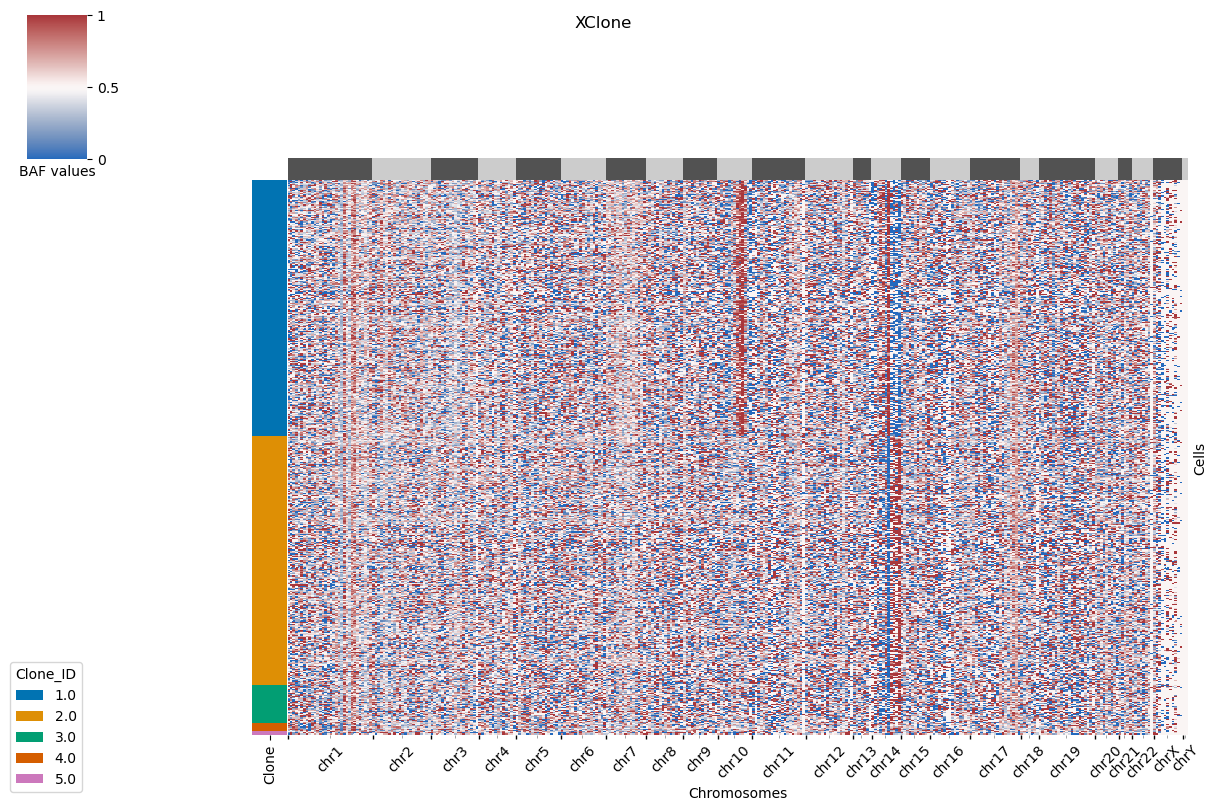

In [63]:
xclone.pl.visualize_cell_BAF(merge_Xdata, Xlayer = "BAF", cell_anno_key = "Clone_ID")  

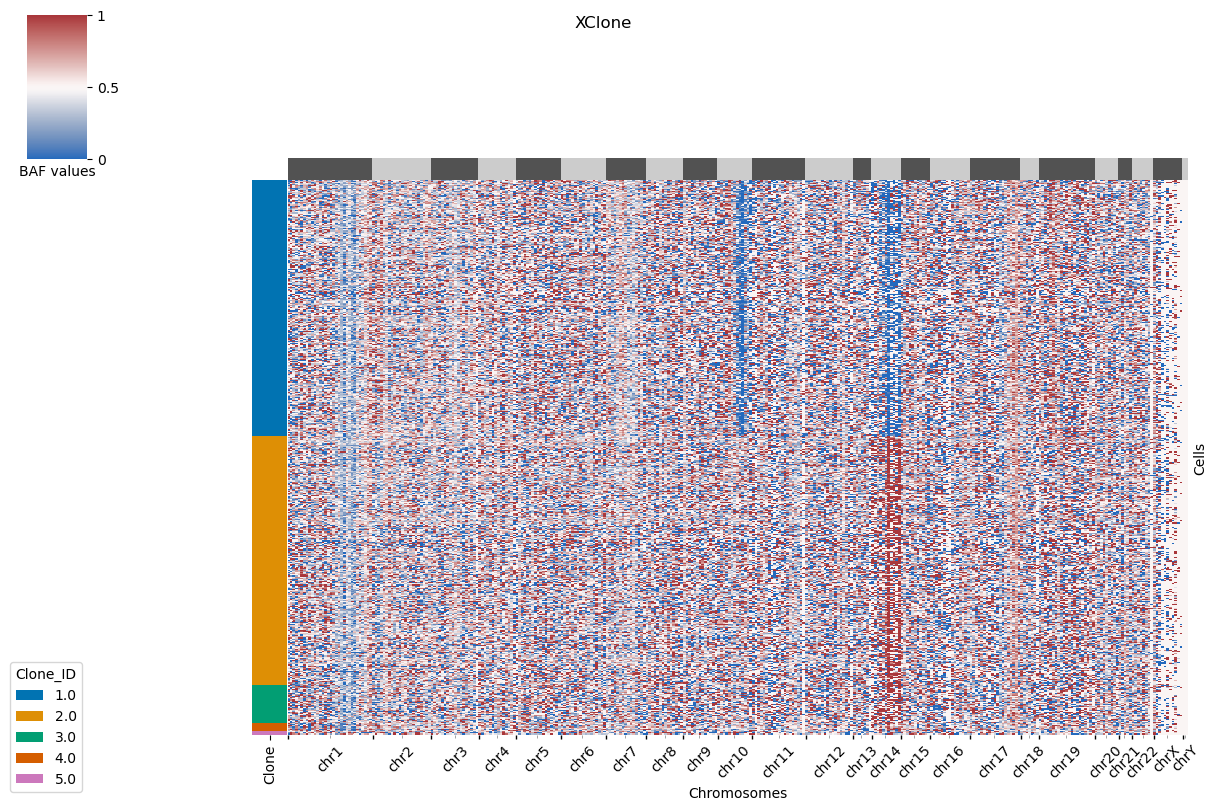

In [64]:
xclone.pl.visualize_cell_BAF(merge_Xdata, Xlayer = "BAF_phased",  cell_anno_key = "Clone_ID") 

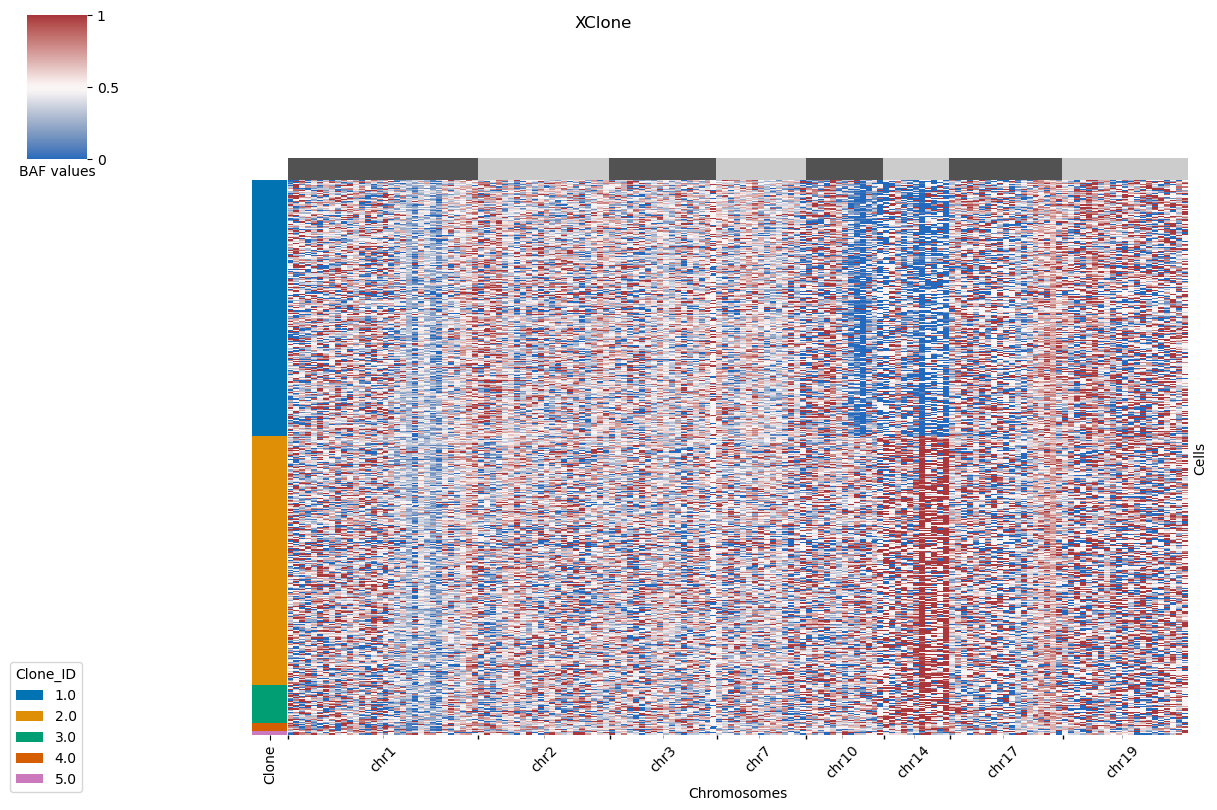

In [65]:
xclone.pl.visualize_cell_BAF(merge_Xdata, Xlayer = "BAF_phased", cell_anno_key = "Clone_ID", chr_lst = ["1", "2", "3", "7", "10", "14", "17", "19"]) 

In [66]:
xclone.model.BAF_fillna(merge_Xdata, Xlayer = "BAF_phased", out_layer = "fill_BAF_phased")

AnnData object with n_obs × n_vars = 492 × 339
    obs: 'Sample', 'GenesExpressed', 'HousekeepingGeneExpression', 'Type', 'Cellcycle', 'OPC-variable', 'OC-like', 'AC-like', 'OPC-like', 'Clone_ID', 'cell_type'
    var: 'chr', 'start', 'stop', 'arm', 'chr_arm', 'band', 'gene1_stop', 'bin_stop_arm', 'bin_stop_chr_arm', 'bin_stop_band', 'bin_idx', 'bin_idx_cum', 'GeneName_lst', 'GeneID_lst', 'bin_genes_cnt'
    uns: 'GeneName_lst', 'GeneID_lst', 'local_phasing_key', 'local_phasing_len'
    layers: 'ad_bin', 'ad_bin1', 'dp_bin', 'ad_bin_phased', 'ad_bin1_phased', 'BAF', 'BAF_phased', 'fill_BAF_phased'

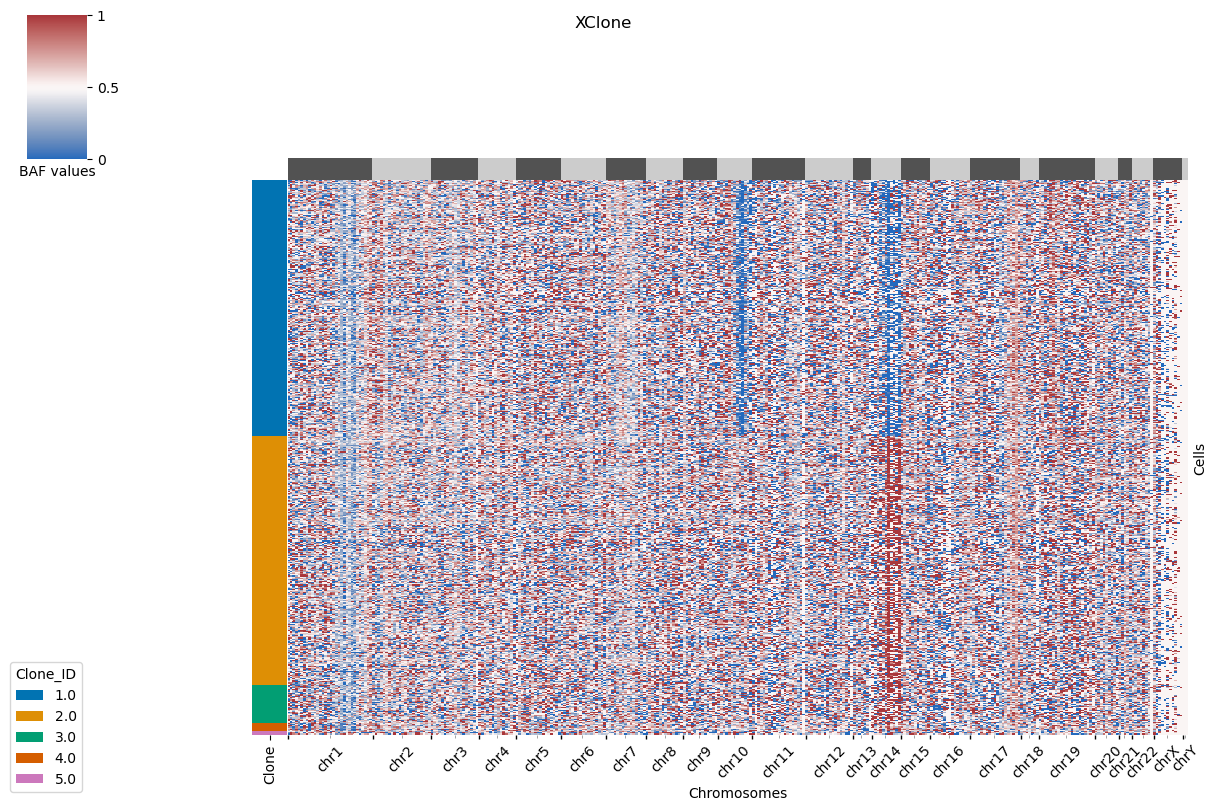

In [67]:
xclone.pl.visualize_cell_BAF(merge_Xdata, Xlayer = "fill_BAF_phased", cell_anno_key = "Clone_ID") 

### III-III -Smoothing

In [68]:
merge_Xdata = xclone.model.get_KNN_connectivities_from_expr(merge_Xdata, RDR_adata)

In [69]:
merge_Xdata = xclone.model.KNN_smooth(merge_Xdata, run_KNN = False, KNN_Xlayer=None, KNN_connect_use = "connectivities_expr", layer = "fill_BAF_phased", out_layer='BAF_phased_KNN')

In [70]:
merge_Xdata

AnnData object with n_obs × n_vars = 492 × 339
    obs: 'Sample', 'GenesExpressed', 'HousekeepingGeneExpression', 'Type', 'Cellcycle', 'OPC-variable', 'OC-like', 'AC-like', 'OPC-like', 'Clone_ID', 'cell_type'
    var: 'chr', 'start', 'stop', 'arm', 'chr_arm', 'band', 'gene1_stop', 'bin_stop_arm', 'bin_stop_chr_arm', 'bin_stop_band', 'bin_idx', 'bin_idx_cum', 'GeneName_lst', 'GeneID_lst', 'bin_genes_cnt'
    uns: 'GeneName_lst', 'GeneID_lst', 'local_phasing_key', 'local_phasing_len'
    layers: 'ad_bin', 'ad_bin1', 'dp_bin', 'ad_bin_phased', 'ad_bin1_phased', 'BAF', 'BAF_phased', 'fill_BAF_phased', 'BAF_phased_KNN'
    obsp: 'connectivities_expr'

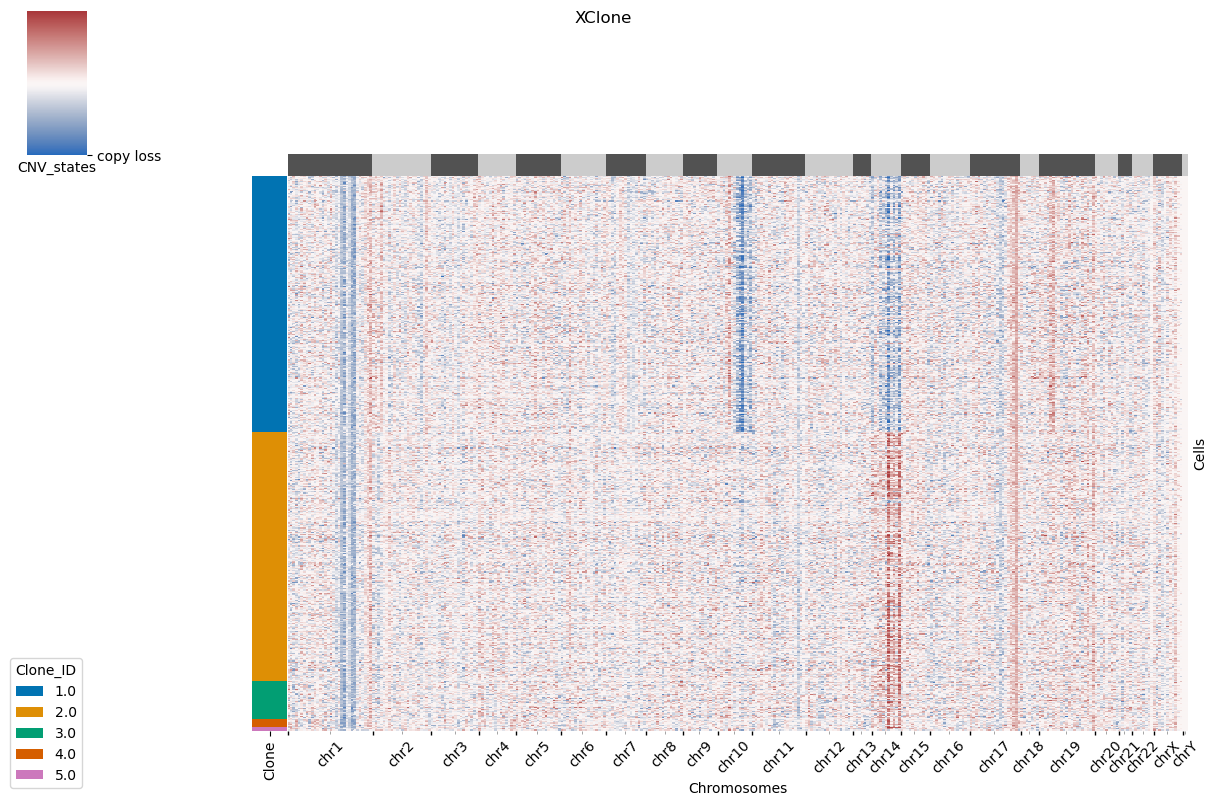

In [71]:
xclone.pl.BAF_smooth_visualization(merge_Xdata, Xlayer = "BAF_phased_KNN", cell_anno_key = "Clone_ID")

In [72]:
merge_Xdata = xclone.model.WMA_smooth(merge_Xdata, layer="fill_BAF_phased", out_layer='BAF_phased_WMA', window_size = 101, verbose=False)

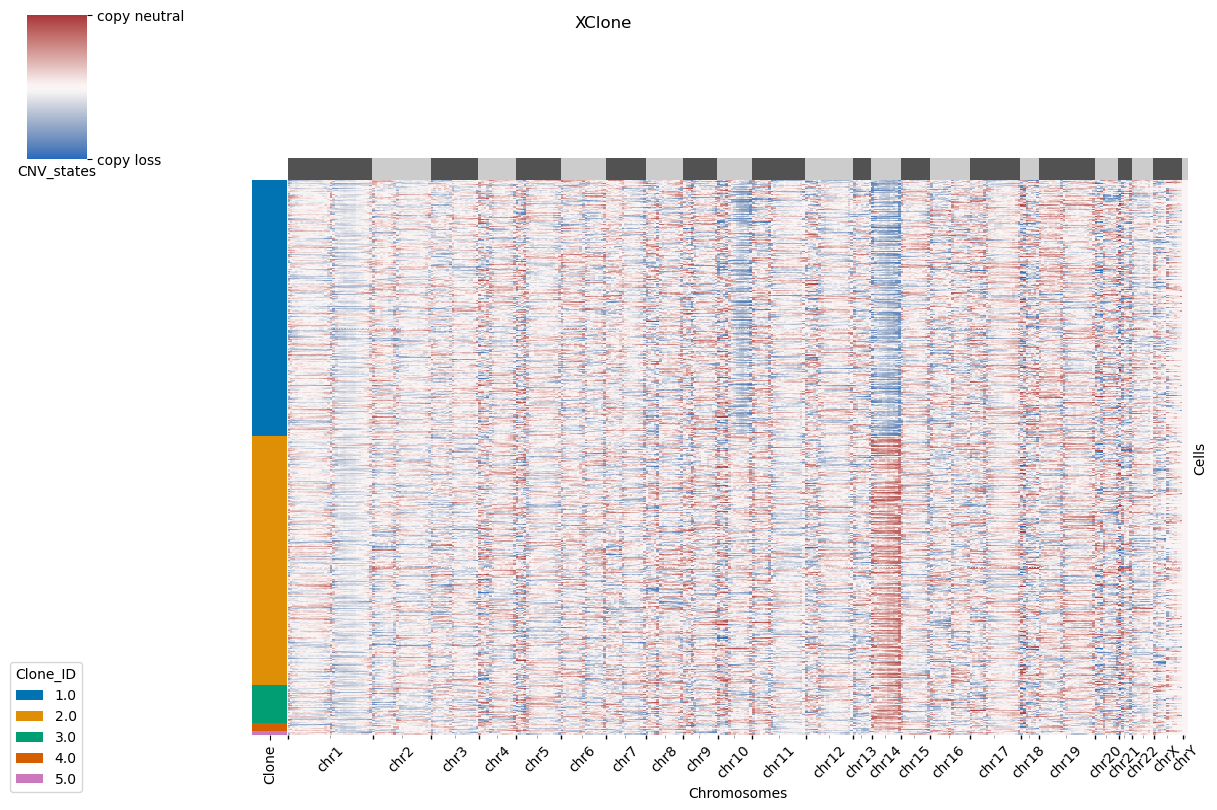

In [73]:
xclone.pl.BAF_smooth_visualization(merge_Xdata, Xlayer = "BAF_phased_WMA", cell_anno_key = "Clone_ID")

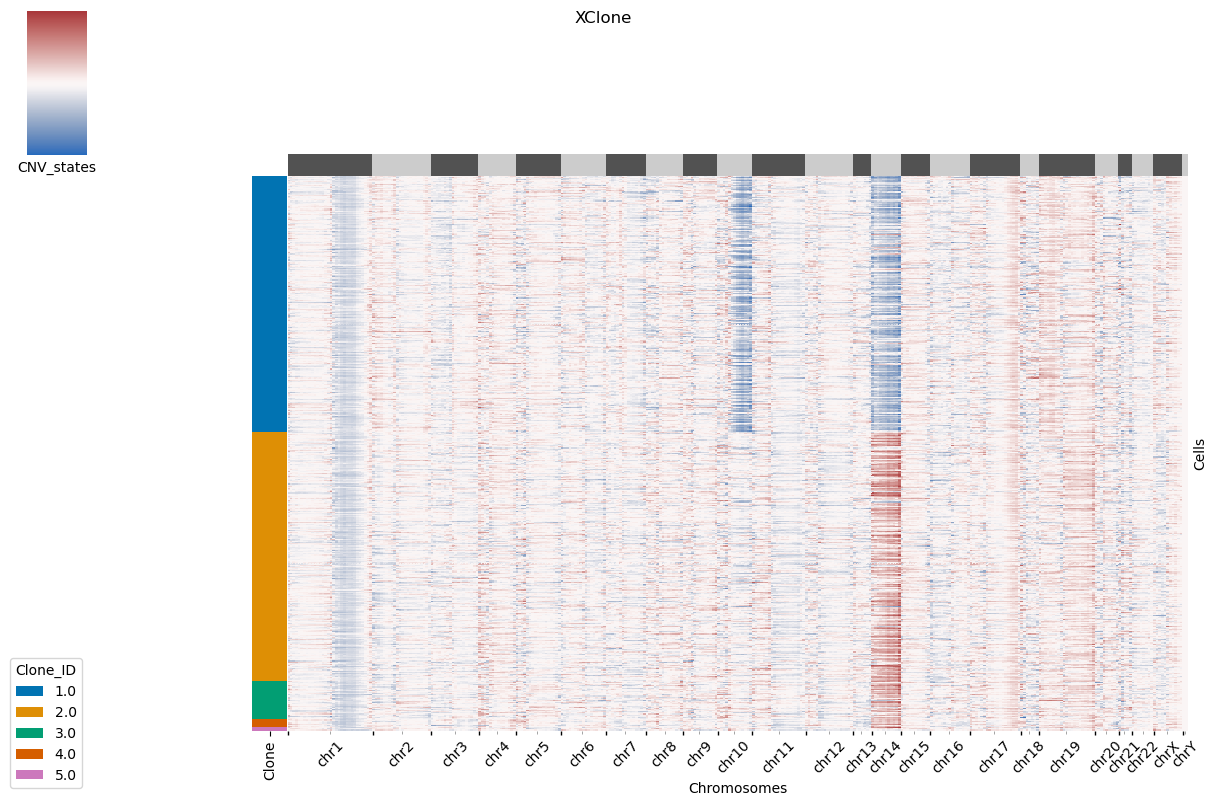

In [74]:
merge_Xdata = xclone.model.WMA_smooth(merge_Xdata, layer="BAF_phased_KNN", out_layer='BAF_phased_KNN_WMA', window_size = 101, verbose=False)

xclone.pl.BAF_smooth_visualization(merge_Xdata, Xlayer = "BAF_phased_KNN_WMA", cell_anno_key = "Clone_ID", save_file = True, out_file = baf_smooth_fig)

In [75]:
BAF_adata.write(BAF_base_file)
merge_Xdata.write(BAF_merge_base_file)

### III-IV-Beat binomial mixture modelling and HMM smoothing

#### GMM for CNV states guidance

In [76]:
CNV_states = xclone.model.get_CNV_states(merge_Xdata, Xlayer = "BAF_phased_WMA", 
                   n_components = 3, 
                   means_init = None,
                   max_iter = 200)
CNV_states

guide_theo_states = xclone.model.guide_BAF_theo_states(CNV_states)

[XClone get_CNV_states] time_used: 13.73seconds


array([[0.49800842],
       [0.32864486],
       [0.66866486]])

In [77]:
guide_theo_states

array([0.32864486, 0.66866486])

In [78]:
merge_Xdata = xclone.model.get_BAF_ref(merge_Xdata, Xlayer = "fill_BAF_phased", out_anno = "ref_BAF_phased", 
                anno_key = "cell_type", ref_cell = "N")
merge_Xdata = xclone.model.get_BAF_ref(merge_Xdata, Xlayer = "fill_BAF_phased", out_anno = "ref_BAF_phased_clipped", 
                anno_key = "cell_type", ref_cell = "N", clipping = True)

do clipping at ref BAF


In [79]:
merge_Xdata.var

chr      start       stop arm chr_arm    band  gene1_stop bin_stop_arm  \
0       1      29554    1946969   p      1p  p36.33       31109            p   
100     1    1950780    7913572   p      1p  p36.33     1962192            p   
200     1    7979907   13369057   p      1p  p36.23     8000926            p   
300     1   13386646   18812478   p      1p  p36.21    13390765            p   
400     1   18957500   24194784   p      1p  p36.13    19075360            p   
...    ..        ...        ...  ..     ...     ...         ...          ...   
32323   X  129263337  142604631   q      Xq   q26.1   129299861            q   
32423   X  142596564  153154444   q      Xq   q27.3   142605303            q   
32523   X  153167985  155246502   q      Xq     q28   153172620            q   
32584   Y    2654896   26632610   p      Yp  p11.31     2655740            q   
32684   Y   26716349   28114889   q      Yq  q11.23    26753172            q   

      bin_stop_chr_arm bin_stop_band  bin_idx  bin_idx_cum  \
0                   1p        p36.33        0            0   
100                 1p        p36.23        1            1   
200                 1p        p36.21        2            2   
300                 1p        p36.13        3            3   
400                 1p        p36.11        4            4   
...                ...           ...      ...          ...   
32323               Xq         q27.3        8          334   
32423               Xq           q28        9          335   
32523               Xq           q28       10          336   
32584               Yq        q11.23        0          337   
32684               Yq        q11.23        1          338   

                                            GeneName_lst  \
0      [MIR1302-10, FAM138A, OR4F5, RP11-34P13.7, RP1...   
100    [GABRD, RP11-547D24.3, PRKCZ, RP5-892K4.1, RP1...   
200    [TNFRSF9, PARK7, ERRFI1, RP11-431K24.1, RP11-4...   
300    [PRAMEF8, PRAMEF9, RP11-219C24.10, PRAMEF13, P...   
400    [PAX7, TAS1R2, RP13-279N23.2, ALDH4A1, IFFO2, ...   
...                                                  ...   
32323  [AIFM1, RAB33A, ZNF280C, SLC25A14, GPR119, RBM...   
32423  [SPANXN3, SLITRK4, SPANXN2, RP3-526F5.2, UBE2N...   
32523  [AVPR2, ARHGAP4, NAA10, RENBP, HCFC1, HCFC1-AS...   
32584  [SRY, RPS4Y1, ZFY, ZFY-AS1, LINC00278, TGIF2LY...   
32684  [TTTY4B, BPY2B, DAZ3, DAZ4, BPY2C, TTTY4C, TTT...   

                                              GeneID_lst  bin_genes_cnt  \
0      [ENSG00000243485, ENSG00000237613, ENSG0000018...            100   
100    [ENSG00000187730, ENSG00000226969, ENSG0000006...            100   
200    [ENSG00000049249, ENSG00000116288, ENSG0000011...            100   
300    [ENSG00000182330, ENSG00000204501, ENSG0000022...            100   
400    [ENSG00000009709, ENSG00000179002, ENSG0000025...            100   
...                                                  ...            ...   
32323  [ENSG00000156709, ENSG00000134594, ENSG0000005...            100   
32423  [ENSG00000189252, ENSG00000179542, ENSG0000020...            100   
32523  [ENSG00000126895, ENSG00000089820, ENSG0000010...             61   
32584  [ENSG00000184895, ENSG00000129824, ENSG0000006...            100   
32684  [ENSG00000235412, ENSG00000183795, ENSG0000018...             12   

       ref_BAF_phased  ref_BAF_phased_clipped  
0            0.192593                0.300000  
100          0.796296                0.700000  
200          0.722919                0.700000  
300          0.345238                0.345238  
400          0.702083                0.700000  
...               ...                     ...  
32323        0.708333                0.700000  
32423        0.500000                0.500000  
32523        0.500000                0.500000  
32584        0.500000                0.500000  
32684        0.500000                0.500000  

[339 rows x 17 columns]

### HMM smoothing 

In [80]:
merge_Xdata = xclone.model.get_BAF_ref(merge_Xdata, Xlayer = "fill_BAF_phased", out_anno = "ref_BAF_phased", 
                anno_key = "cell_type", ref_cell = "N")

states used: [[0.32864486 0.5        0.66866486]
 [0.32864486 0.5        0.66866486]
 [0.32864486 0.5        0.66866486]
 ...
 [0.32864486 0.5        0.66866486]
 [0.32864486 0.5        0.66866486]
 [0.32864486 0.5        0.66866486]]
[XClone] specific Center states used.
[XClone]: validated probability, all finite.
cal emm prob time 0 seconds
normalize the input emm_prob_log
normalized emm_prob_log
generate new layer key value: bin_phased_BAF_specific_center_emm_prob_log_KNN
[BAF smoothing] time_used: 0.08seconds
filter nan emm_prob
[XClone] multiprocessing for each brk item
nproc: 80
[XClone HMM smoothing] Time used: 7 seconds


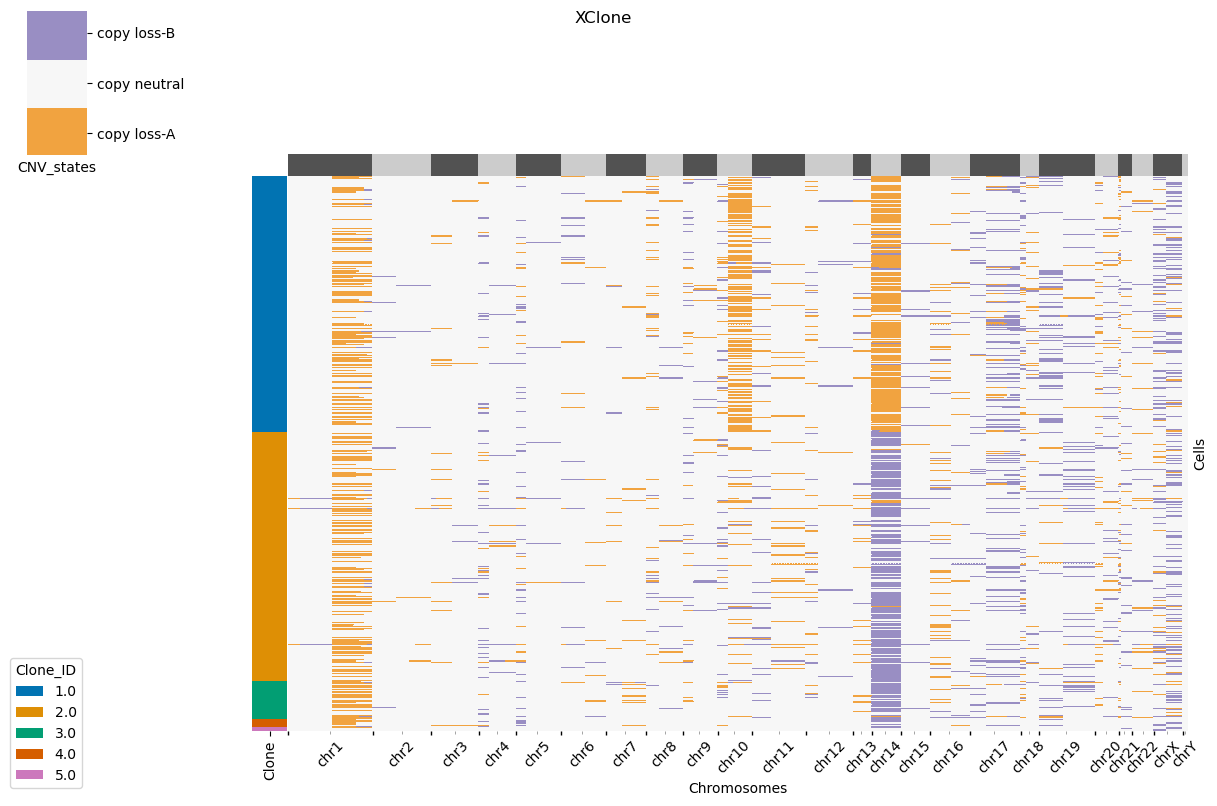

In [81]:
## if you have limited ref cells , you can set theo_baf as 0.5   *important
merge_Xdata.var["theo_BAF"] = 0.5

used_specific_states = xclone.model.gene_specific_BAF(merge_Xdata, theo_states= guide_theo_states, specific_BAF = "theo_BAF")


merge_Xdata = xclone.model.calculate_Xemm_prob_bb(merge_Xdata, AD_key = "ad_bin1_phased", DP_key = "dp_bin", concentration = 100, 
                                                  outlayer = "bin_phased_BAF_specific_center_emm_prob_log", states = used_specific_states)

merge_Xdata = xclone.model.BAF_smoothing(merge_Xdata, 
                  inlayer = "bin_phased_BAF_specific_center_emm_prob_log",
                  outlayer = "bin_phased_BAF_specific_center_emm_prob_log_KNN",
                  KNN_connectivities_key = "connectivities_expr",
                  KNN_smooth = True)


start_prob_ = np.array([0.3, 0.4, 0.3])
t = 1e-6
trans_prob_ = np.array([[1-2*t, t, t],[t, 1-2*t, t],[t, t, 1-2*t]])

merge_Xdata = xclone.model.XHMM_smoothing(merge_Xdata, start_prob = start_prob_,  trans_prob = trans_prob_, emm_inlayer = "bin_phased_BAF_specific_center_emm_prob_log_KNN", nproc = 80, verbose = False)

xclone.pl.CNV_visualization2(merge_Xdata, weights = False, cell_anno_key = "Clone_ID", save_file = True, out_file = baf_final_fig)

In [82]:
merge_Xdata

AnnData object with n_obs × n_vars = 492 × 339
    obs: 'Sample', 'GenesExpressed', 'HousekeepingGeneExpression', 'Type', 'Cellcycle', 'OPC-variable', 'OC-like', 'AC-like', 'OPC-like', 'Clone_ID', 'cell_type'
    var: 'chr', 'start', 'stop', 'arm', 'chr_arm', 'band', 'gene1_stop', 'bin_stop_arm', 'bin_stop_chr_arm', 'bin_stop_band', 'bin_idx', 'bin_idx_cum', 'GeneName_lst', 'GeneID_lst', 'bin_genes_cnt', 'ref_BAF_phased', 'ref_BAF_phased_clipped', 'theo_BAF'
    uns: 'GeneName_lst', 'GeneID_lst', 'local_phasing_key', 'local_phasing_len'
    layers: 'ad_bin', 'ad_bin1', 'dp_bin', 'ad_bin_phased', 'ad_bin1_phased', 'BAF', 'BAF_phased', 'fill_BAF_phased', 'BAF_phased_KNN', 'BAF_phased_WMA', 'BAF_phased_KNN_WMA', 'bin_phased_BAF_specific_center_emm_prob_log', 'bin_phased_BAF_specific_center_emm_prob_log_KNN', 'emm_prob_log_noHMM', 'emm_prob_noHMM', 'posterior_mtx', 'posterior_mtx_log'
    obsp: 'connectivities_expr'

In [83]:
merge_Xdata.write(BAF_final_file)

## Part IV-XClone RDR&BAF Combination

### params setting

In [84]:
## files prepared
## params for this dataset
dataset_name = "BCH869_scRNA"

## output
# default 1
gene_exp_group = 1
out_dir = "/storage/yhhuang/users/rthuang/xclone/demo_v1/BCH869_scRNA/data/"
fig_dir = "/storage/yhhuang/users/rthuang/xclone/demo_v1/BCH869_scRNA/plot/"

xclone.al.dir_make(out_dir)
xclone.al.dir_make(fig_dir)

## use_file
# output after CNV calling
BAF_final_file = out_dir + "BAF_merge_Xdata_KNN_HMM_post.h5ad"
## use RDR connectivities
RDR_final_file = out_dir + "RDR_adata_KNN_HMM_post.h5ad"

RDR_combine_corrected_file = out_dir + "combine_adata_corrected.h5ad"

combine_final_file = out_dir + "combined_final.h5ad"
# visualization
# default:XClone
cell_anno_key_plot = "Clone_ID"

fig_title = ""
combine_res_base_fig = fig_dir + dataset_name + "_combine_base.png"

combine_res_select_fig = fig_dir + dataset_name + "_combine_select.png"

### IV-I load preprocessed dataset

In [85]:
import anndata as an

RDR_Xdata = an.read_h5ad(RDR_final_file)
BAF_merge_Xdata = an.read_h5ad(BAF_final_file)

### IV-II bin to genes mapping

In [86]:
# map BAF to RDR
combine_Xdata = xclone.model.bin_to_gene_mapping(BAF_merge_Xdata,
                        RDR_Xdata,
                        Xlayer = "posterior_mtx",
                        extend_layer = "BAF_extend_post_prob",
                        return_prob = False)

[XClone] BAF extend bins to genes.
[XClone data checking]: RDR and BAF in same cell order
No genes in this bin: 20698 20707 , skip this bin.
No genes in this bin: 31521 31522 , skip this bin.
No genes in this bin: 32584 32684 , skip this bin.
No genes in this bin: 32684 32784 , skip this bin.


In [87]:
combine_Xdata = xclone.model.CNV_prob_combination(combine_Xdata,
                         RDR_layer = "posterior_mtx",
                         BAF_layer = "BAF_extend_post_prob")

In [88]:
combine_Xdata.write(RDR_combine_corrected_file)

### IV-III visualization

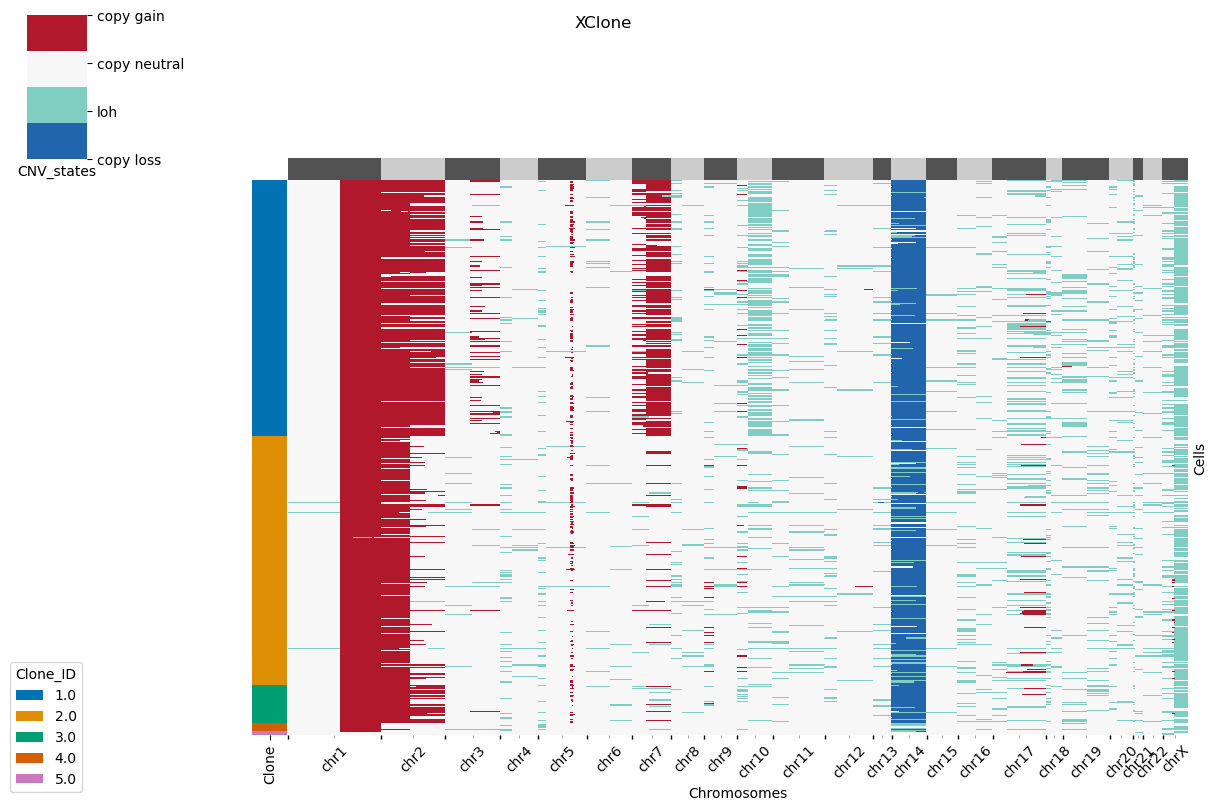

In [89]:
## BASE PLOT
xclone.pl.CNV_visualization_combine(combine_Xdata, Xlayer = "prob1_merge", cell_anno_key = "Clone_ID",  save_file = True, out_file = combine_res_base_fig)

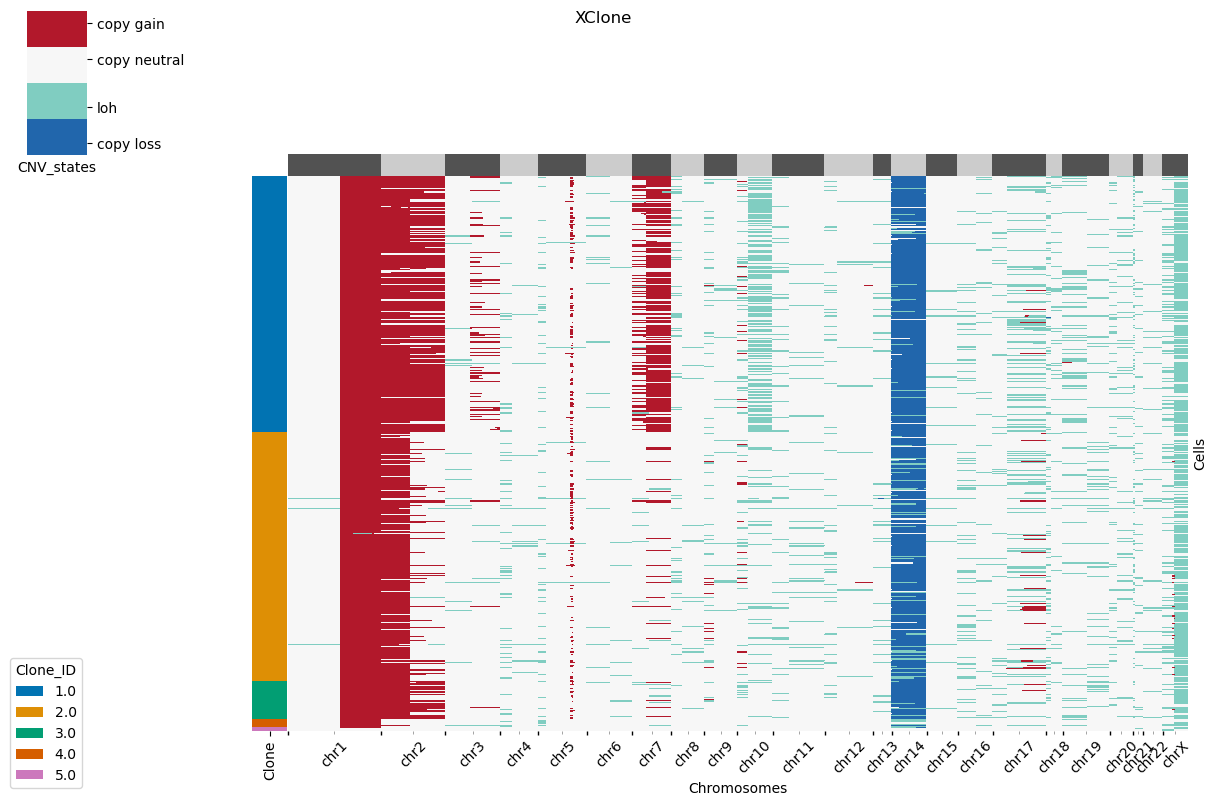

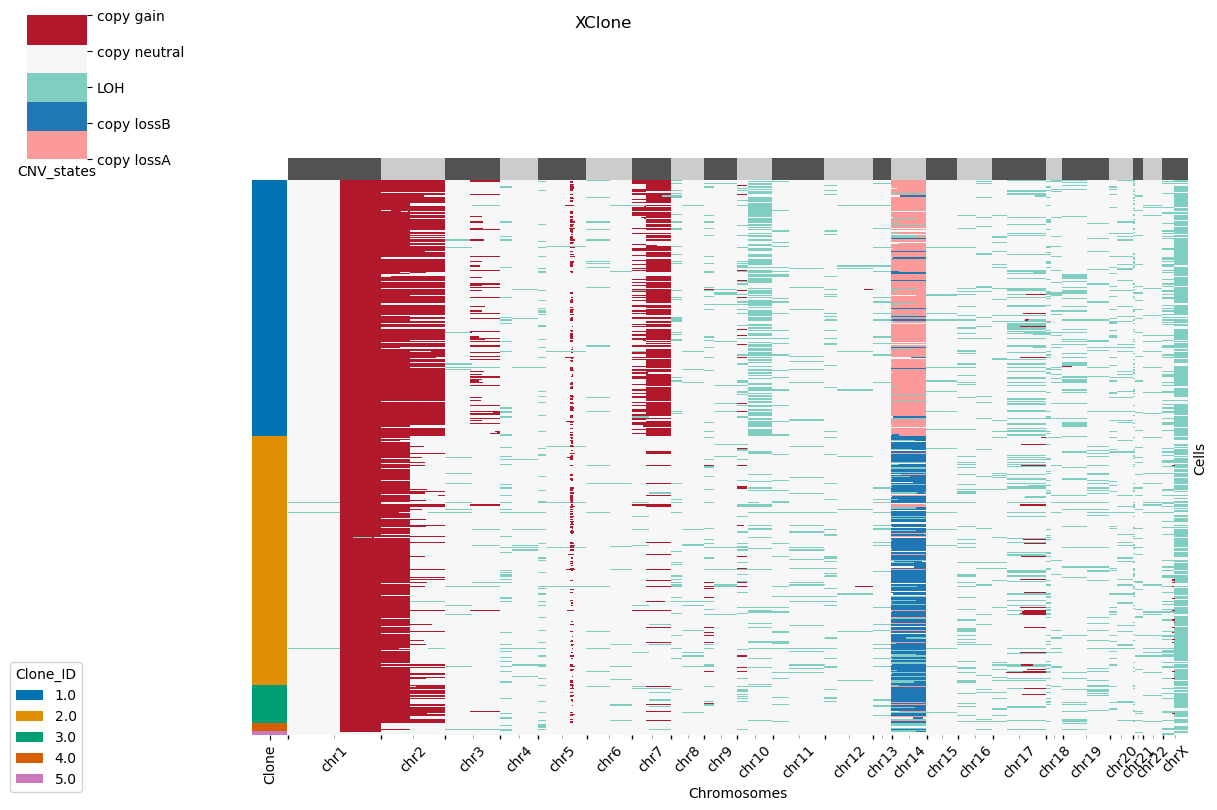

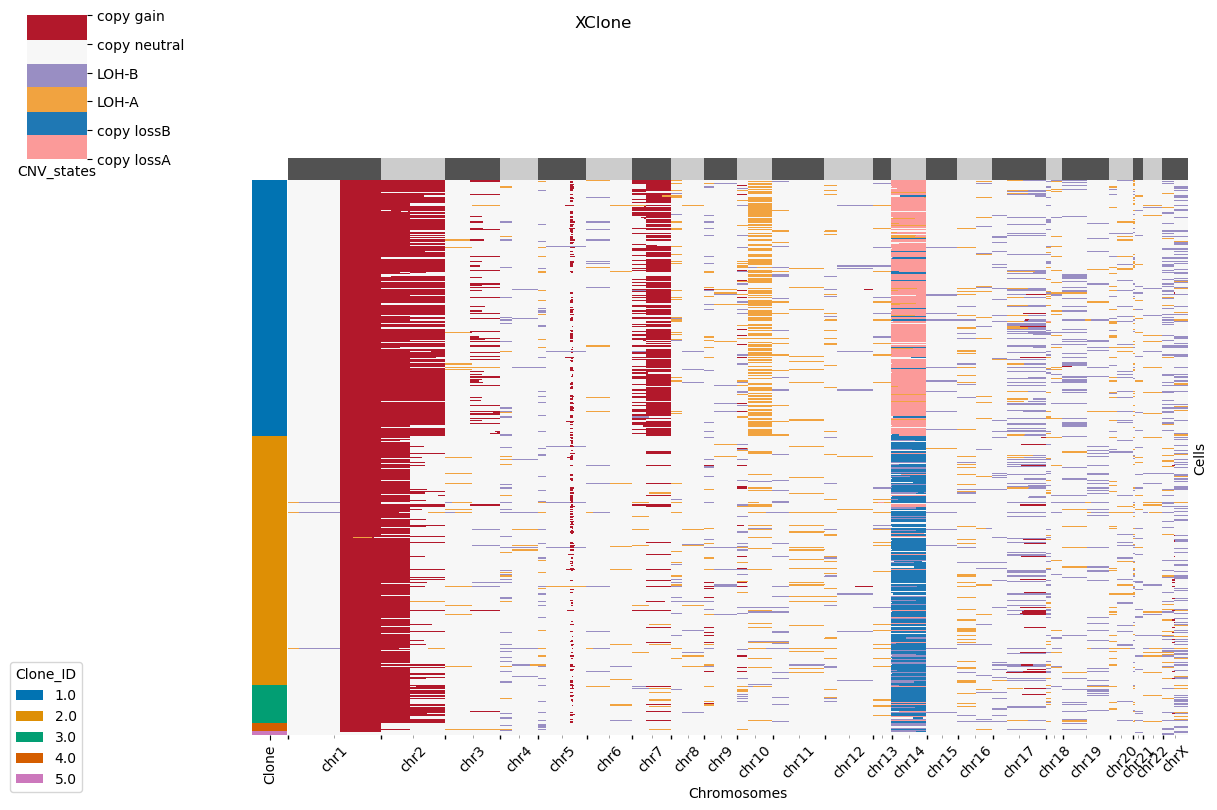

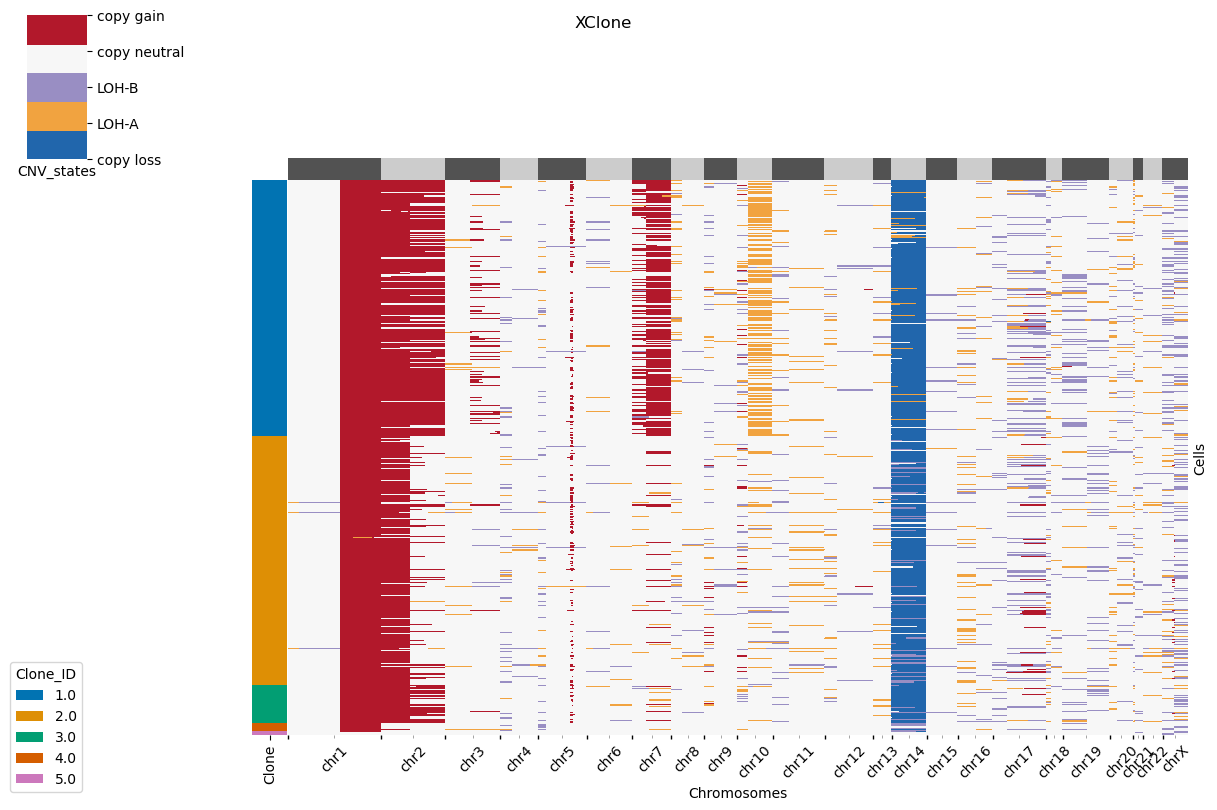

In [90]:
combine_Xdata = xclone.model.CNV_prob_merge_for_plot(combine_Xdata, Xlayer = "loss_corrected_prob1")



colorbar_ticks = [0.25,1,2,2.75]
colorbar_label = ["copy loss","loh", "copy neutral", "copy gain"]
xclone.pl.CNV_visualization_combine(combine_Xdata, Xlayer = "plot_prob_merge1", cell_anno_key = cell_anno_key_plot, color_map_name = "combine_cmap", states_num = 4, 
                                    colorbar_ticks =colorbar_ticks,
                                    colorbar_label =colorbar_label)

colorbar_ticks = [0,1,2,3,4]
colorbar_label = ["copy lossA", "copy lossB", "LOH", "copy neutral", "copy gain"]
xclone.pl.CNV_visualization_combine(combine_Xdata, Xlayer = "plot_prob_merge2", cell_anno_key = cell_anno_key_plot, color_map_name = "combine_cmap2", states_num = 5,
                                    colorbar_ticks =colorbar_ticks,
                                    colorbar_label =colorbar_label,
                                    save_file = True, out_file = combine_res_select_fig)

colorbar_ticks = [0,1,2,3,4,5]
colorbar_label = ["copy lossA", "copy lossB","LOH-A", "LOH-B", "copy neutral", "copy gain"]
xclone.pl.CNV_visualization_combine(combine_Xdata, Xlayer = "plot_prob_merge3", cell_anno_key = cell_anno_key_plot, color_map_name = "combine_cmap3", states_num = 6,
                                    colorbar_ticks =colorbar_ticks,
                                    colorbar_label =colorbar_label)

colorbar_ticks = [0,1,2,3,4]
colorbar_label = ["copy loss","LOH-A", "LOH-B",  "copy neutral", "copy gain"]
xclone.pl.CNV_visualization_combine(combine_Xdata, Xlayer = "plot_prob_merge4", cell_anno_key = cell_anno_key_plot, color_map_name = "combine_cmap4", states_num = 5,
                                    colorbar_ticks =colorbar_ticks,
                                    colorbar_label =colorbar_label)

In [91]:
combine_Xdata.write(combine_final_file)

## Show paper results for comparasion

(-0.5, 1203.5, 426.5, -0.5)

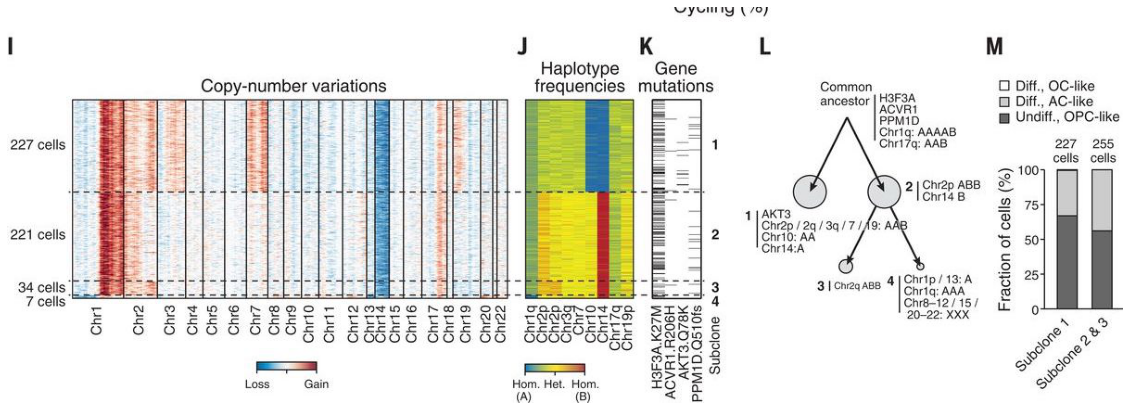

In [92]:

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


img = mpimg.imread('/home/rthuang/ResearchProject/XClone/raw_data/BCH_data/BCH_clones_from_paper.jpg')
figsize = (20,12)
fig, ax = plt.subplots(1,1, figsize=figsize)
imgplot = ax.imshow(img)
ax.axis('off')
plt.show()
